In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
import cv2 as cv


In [25]:
train = pd.read_csv('datasets/fashion-mnist_train.csv')
test = pd.read_csv('datasets/fashion-mnist_test.csv')

In [26]:
# Copy the features and target columns to different arrays: 
y_train= train['label']
# Drop the label feature
x_train = train.drop("label",axis=1)

x_train_np = np.float32(x_train.to_numpy())
y_train_np = np.int64(y_train.to_numpy())

In [27]:
# Copy the features and target columns to different arrays: 
y_test= test['label']
# Drop the label feature
x_test = test.drop("label",axis=1)

x_test_np = np.float32(x_test.to_numpy())
y_test_np = np.int64(y_test.to_numpy())

In [28]:
model = cv.ml.SVM_create()
model.setType(cv.ml.SVM_C_SVC)
model.setKernel(cv.ml.SVM_LINEAR)
model.setTermCriteria((cv.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
model.setC(2.5)

In [29]:
model.train(x_train_np, cv.ml.ROW_SAMPLE, y_train_np)

True

Результат классификации: 0.0


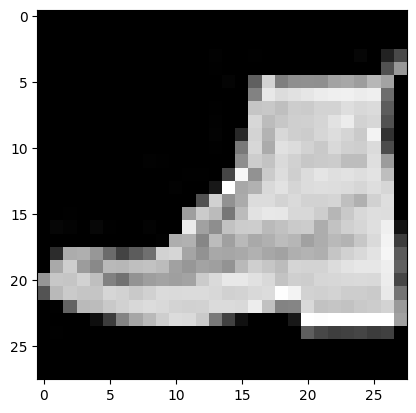

In [30]:
numberOfSample = 1700
sample = x_test_np[numberOfSample:numberOfSample + 1, :]
retVal, result = model.predict(sample)
plt.imshow(sample.reshape(28, 28), 'gray')
print(f'Результат классификации: {retVal}')

In [31]:
retVal, result = model.predict(x_test_np)

# проверяем результат классификации с метками классов
matches = np.equal(result, y_test_np)

# посчитаем количество правильных ответов
matches = matches.astype(np.int64)
correct = np.count_nonzero(matches)

# посчитаем точность классификации
accuracy = (correct * 100.00) / result.size

print(f'Точность классификации: {accuracy}')

Точность классификации: 100000.0
